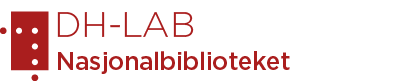

### Oppstart


In [1]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
from dhlab.module_update import css
import networkx as nx
%matplotlib inline

In [2]:
css()

In [3]:
plot = lambda x, lw=5: x.plot(figsize=(10,5), lw=lw)

In [4]:
import warnings
warnings.filterwarnings('ignore')

# N-gramdata

Data kan hentes fra [NB N-gram](https://www.nb.no/sp_tjenester/beta/ngram_1/trends#ngram/query?terms=demokrati%2C+diktatur&lang=all&case_sens=0&freq=rel&corpus=bok) med kommandoen `nb_ngram(<ord>, periode)`. Dataene utgjør en **dataramme** som kan analyseres og plottes

In [5]:
nb.nb_ngram('han, hun', smooth=1, years=(1950, 1990)).head(10)

,han,hun
1950,1.019108,0.355012
1951,1.026575,0.337322
1952,0.970808,0.340458
1953,0.951532,0.311137
1954,0.787041,0.281906
1955,0.753244,0.234209
1956,0.693097,0.212321
1957,0.672339,0.198300
1958,0.696554,0.213855
1959,0.876191,0.286295


## Plotting

Lag en figur med egendefinert (se over) kommando `plot(<ngram dataramme>)` eller bruk innebygd Python `<ngram>.plot(...)`

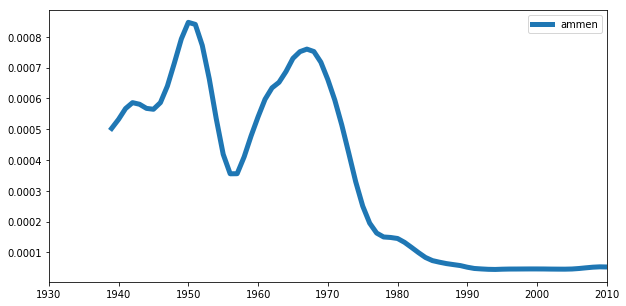

In [6]:
plot(nb.nb_ngram("ammen", smooth=10, years=(1930, 2010)));

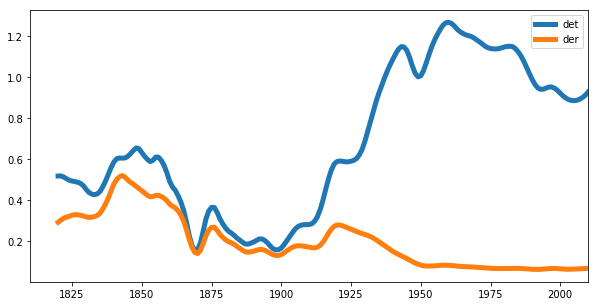

In [7]:
plot(nb.nb_ngram("det, der", smooth=10, corpus='avis', years=(1810, 2010)));

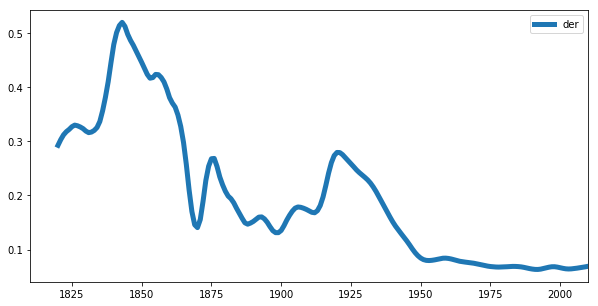

In [8]:
plot(nb.nb_ngram("der", smooth=10, corpus='avis', years=(1810, 2010)));

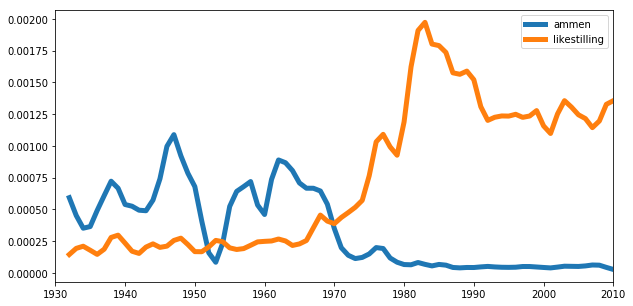

In [9]:
plot(nb.nb_ngram("ammen, likestilling", smooth=3, years=(1930, 2010)));

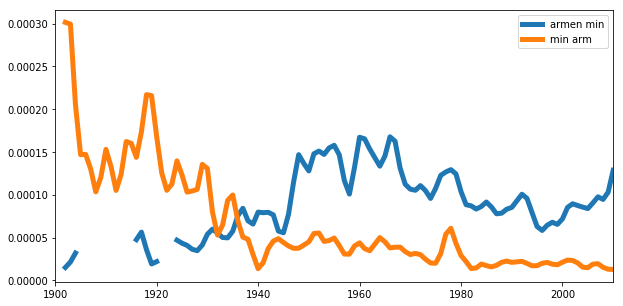

In [10]:
plot(nb.nb_ngram("armen min, min arm", smooth=3, years=(1900, 2010)));

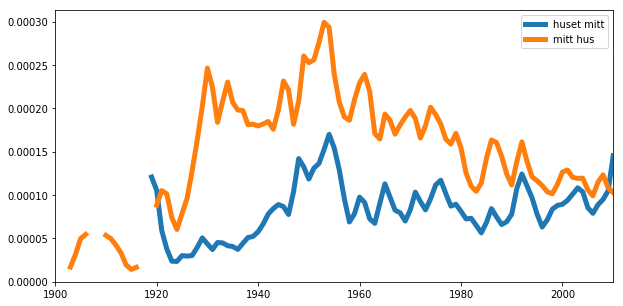

In [11]:
plot(nb.nb_ngram("huset mitt, mitt hus", smooth=3, years=(1900, 2010)));

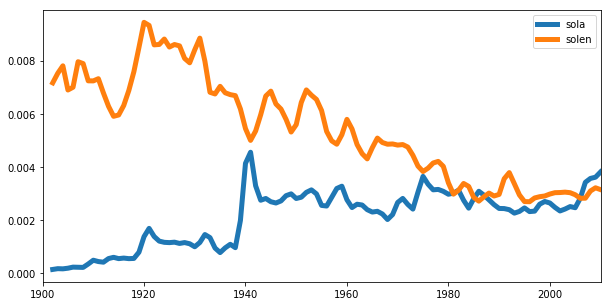

In [12]:
plot(nb.nb_ngram("sola, solen", smooth=3, years=(1900, 2010)));

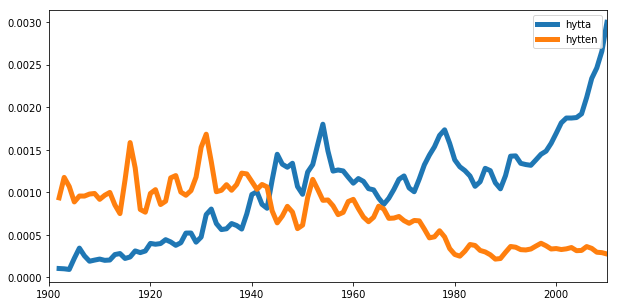

In [13]:
plot(nb.nb_ngram("hytta, hytten", smooth=3, years=(1900, 2010)));

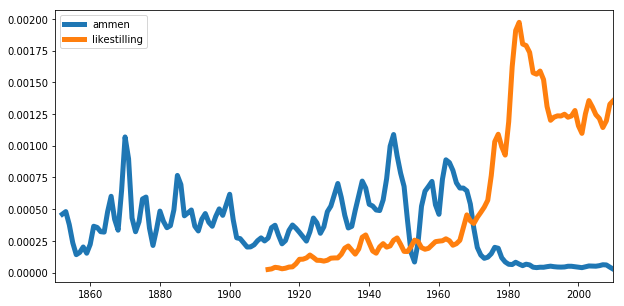

In [14]:
plot(nb.nb_ngram("ammen, likestilling", smooth=3, years=(1850, 2010)));

In [15]:
tot = nb.frame(nb.totals(100))

In [16]:
nb.normalize_corpus_dataframe(tot)

True

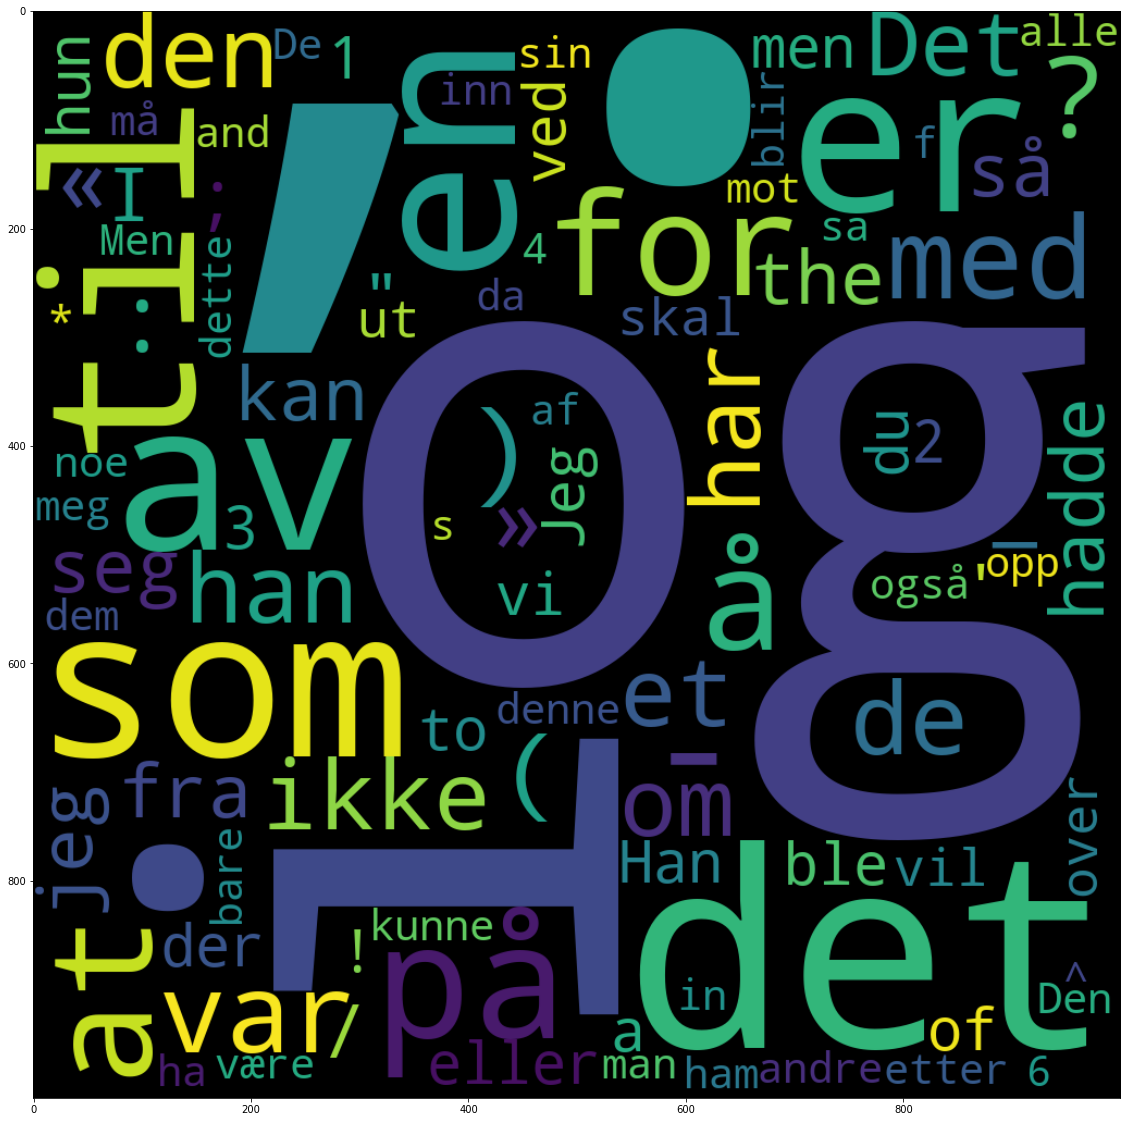

In [17]:
nb.cloud(nb.frame(tot))

## N-gram med jokertegn

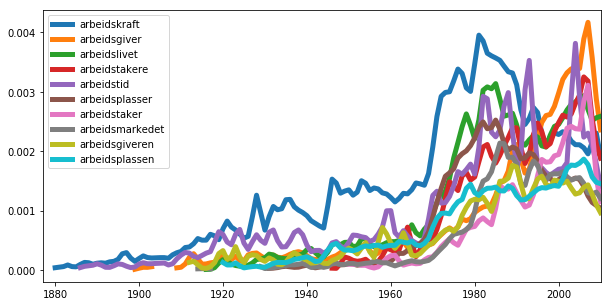

In [18]:
plot(nb.nb_ngram("arbeids*"));

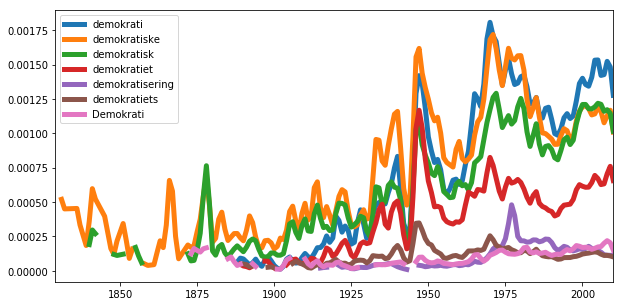

In [19]:
plot(nb.nb_ngram('demokrati*'));

# Galakser


Galaksene måler koblinger mellom ord, og kan brukes for å lage sett av ord til forskjellige formål, som for eksempel sentimentanalyse, eller stedsnavn.

For engelsk og tysk er grunnlagsmaterialet [Google n-gram](https://books.google.com/ngrams/graph?content=democracy&year_start=1800&year_end=2000&corpus=15&smoothing=3&share=&direct_url=t1%3B%2Cdemocracy%3B%2Cc0).

Kommanden er `make_graph(<ord>, lang=<språk-kode>)`

## Definer koblinger til *is*

I eksemplet ser vi på **is** is engelsk, tysk og norsk, og hvordan språkene grupperer ordet.

### Engelsk

In [20]:
ice = nb.make_graph('ice', lang = 'eng')

#### Se på grafen

Grafer tegnes og analyseres med pakken [networkx](https://networkx.github.io/). Kommandoer er bygd over den pakken, og kommando for å vise grafen er `show_graph` fra modulen `graph_networkx_louvain`.

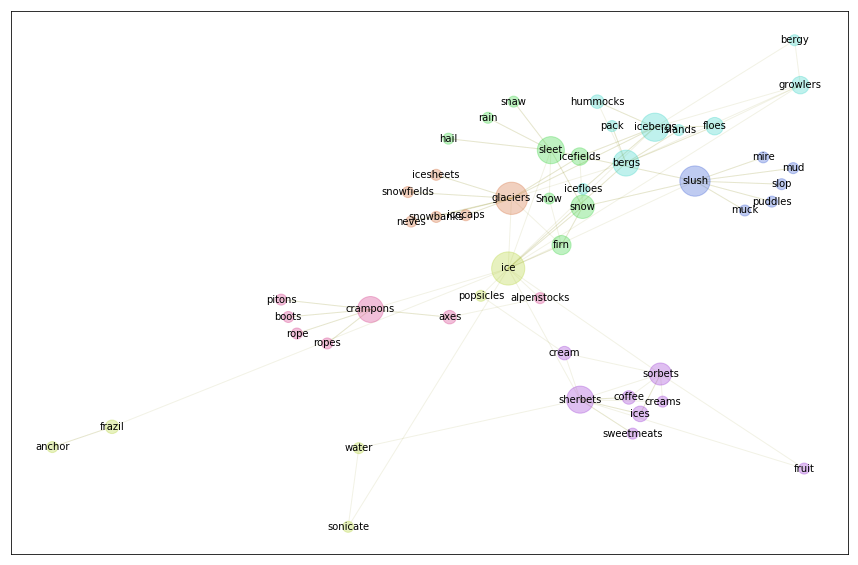

In [21]:
gnl.show_graph(ice, spread = 0.5)

#### Clustre fra grafen

Bruk kommando `show_communities` fra `gnl` for å se på clustre.

In [22]:
gnl.show_communities(ice)

ice-frazil :  ice, frazil, popsicles, water, sonicate, anchor

glaciers-snow :  glaciers, snow, firn, icefields, snowfields, Snow, icesheets, icecaps, neves, snowbanks

icebergs-bergs :  icebergs, bergs, growlers, floes, hummocks, icefloes, pack, bergy, islands

slush-sleet :  slush, sleet, puddles, slop, mud, snaw, rain, mire, hail, muck

sherbets-sorbets :  sherbets, sorbets, ices, cream, coffee, sweetmeats, fruit, creams

crampons-axes :  crampons, axes, rope, pitons, boots, ropes, alpenstocks



### Tysk

In [23]:
Eis = nb.make_graph('Eis', lang='ger')

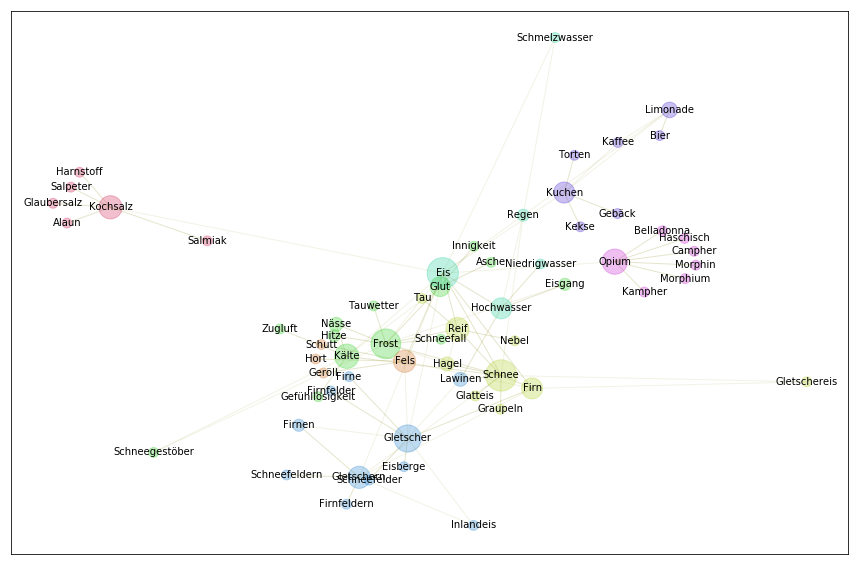

In [24]:
gnl.show_graph(Eis, spread=0.5)

### Tysk har narko-lesning



In [25]:
gnl.show_communities(Eis)

Schnee-Reif :  Schnee, Reif, Firn, Hagel, Tau, Glatteis, Graupeln, Gletschereis, Nebel

Frost-Kälte :  Frost, Kälte, Glut, Nässe, Hitze, Eisgang, Gefühllosigkeit, Zugluft, Tauwetter, Schneefall, Schneegestöber, Asche, Innigkeit

Eis-Hochwasser :  Eis, Hochwasser, Regen, Niedrigwasser, Schmelzwasser

Gletscher-Gletschern :  Gletscher, Gletschern, Lawinen, Firnen, Schneefeldern, Firne, Inlandeis, Eisberge, Firnfeldern, Schneefelder, Firnfelder

Kuchen-Limonade :  Kuchen, Limonade, Gebäck, Kaffee, Bier, Kekse, Torten

Opium-Morphin :  Opium, Morphin, Campher, Kampher, Belladonna, Haschisch, Morphium

Kochsalz-Salpeter :  Kochsalz, Salpeter, Glaubersalz, Salmiak, Harnstoff, Alaun

Fels-Schutt :  Fels, Schutt, Hort, Geröll



### Norsk

More than one word can be added

In [26]:
g_is = nb.make_graph('is', lang='nob')

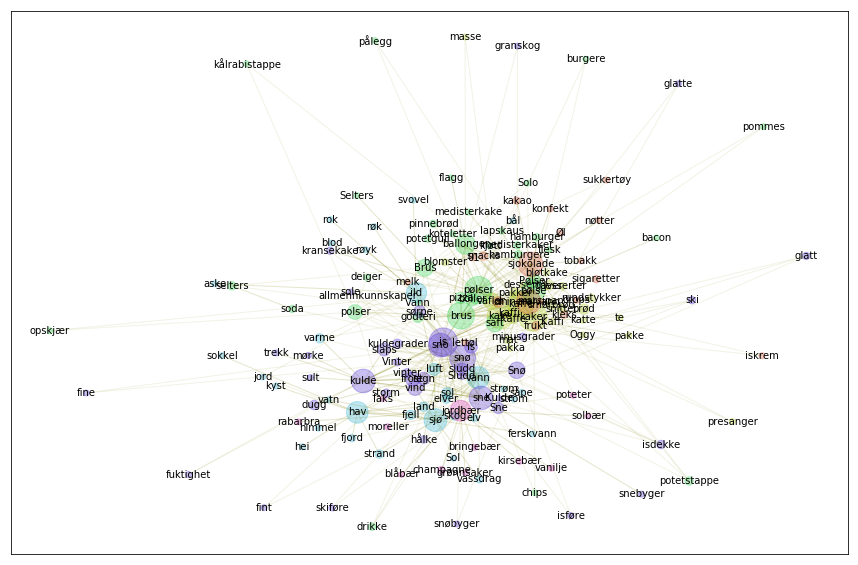

In [27]:
gnl.show_graph(g_is, spread=0.8)

In [28]:
gnl.show_communities(g_is)

kaker-kake :  kaker, kake, kaffe, vafler, brød, kaffi, pakker, gåver, smørbrød, rundstykker, snitter, Kaffe, mat, desserter, blomster, pakke, te, katte, pakka, dessert, Kaffi, presanger, bløtkake, Oggy, masse

pølser-brus :  pølser, brus, pølse, ballonger, saft, Brus, polser, Pølser, boller, pizza, godteri, potetstappe, hamburgere, selters, drikke, soda, pinnebrød, medisterkaker, potetgull, kakao, hamburger, flesk, chips, Solo, koteletter, bacon, lapskaus, kålrabistappe, Vann, kjøtt, Selters, burgere, flagg, deiger, opskjær, medisterkake, pommes, pålegg

sjø-vann :  sjø, vann, hav, ild, luft, sol, varme, land, fjell, strand, elver, skog, elv, fjord, vassdrag, sokkel, røk, bål, røyk, ferskvann, blod, Sol, vatn, såpe, aske, rok, kyst, strom, jord, svovel, hei, strøm, himmel

is-snø :  is, snø, kulde, sno, sne, Snø, vind, frost, regn, sludd, Is, slaps, sørpe, Sne, vinter, kuldegrader, dugg, storm, isdekke, minusgrader, ski, glatt, kransekake, hålke, Sludd, Vinter, snebyger, sult, fuktighe

# Øvelse

Er det noen forskjell i språkene for byer?

In [ ]:
# lag grafer for byer her